In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sex_height_weight.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
X = df.drop('Sex' , axis=1)
y = df['Sex']

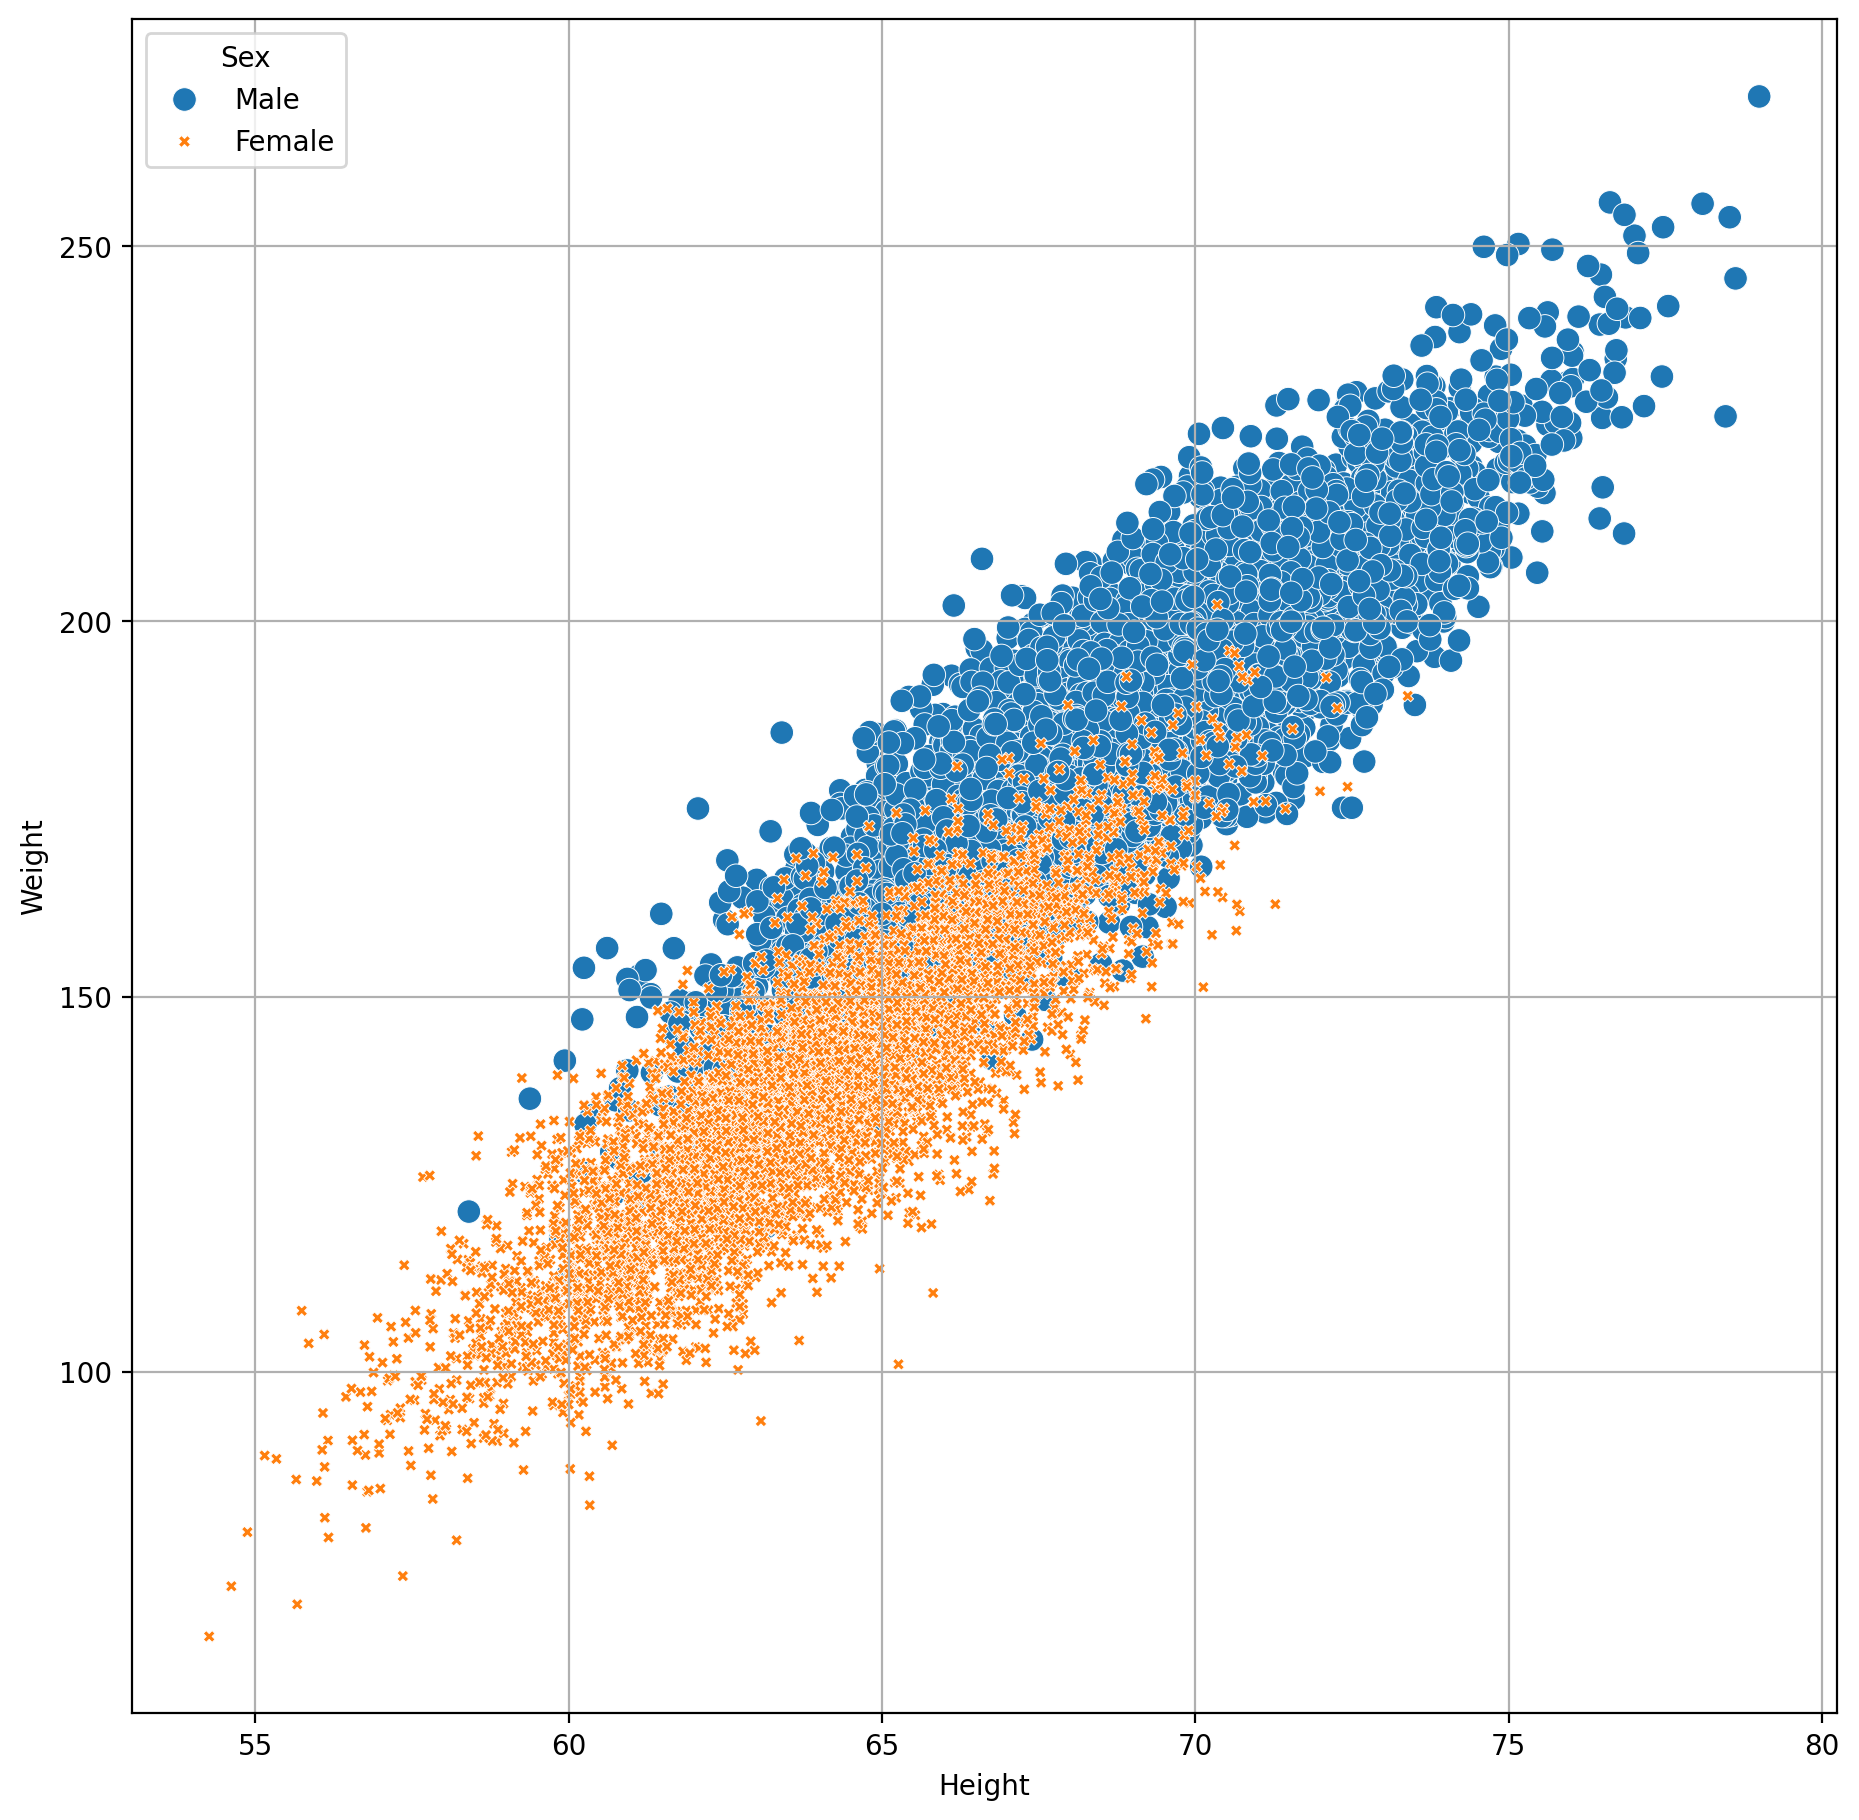

In [29]:
gig = plt.figure(figsize=(11,11), dpi = 200)
sns.scatterplot(x=df['Height'], y=df['Weight'], hue = df['Sex'], style = df['Sex'], size = df['Sex'])
plt.grid()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<Axes: xlabel='Height'>

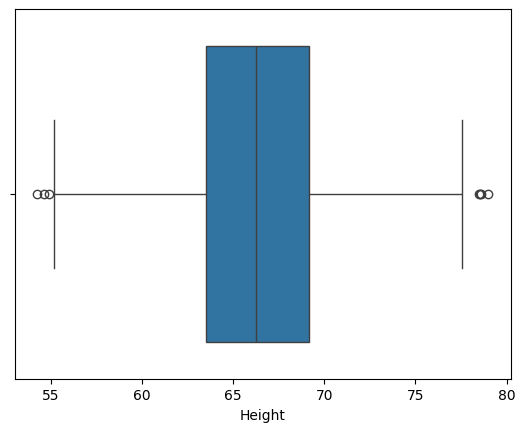

In [7]:
sns.boxplot(x = X_train['Height'])

<Axes: xlabel='Weight'>

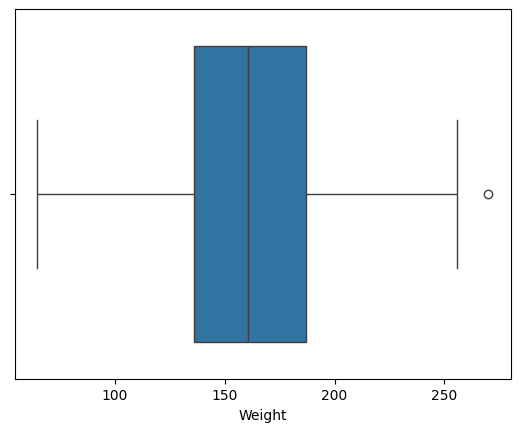

In [8]:
sns.boxplot(x = X_train['Weight'])

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_train

array([[-0.27130454, -0.658076  ],
       [-0.93326112, -0.70565456],
       [-0.74527724, -0.72097796],
       ...,
       [-0.52151415, -0.13566836],
       [ 0.71131556,  0.5689747 ],
       [ 0.3256506 , -0.33595524]])

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
model = RandomForestClassifier()

In [15]:
hyper_params = {
    'n_estimators': [100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'max_leaf_nodes': [None, 10],
    'min_impurity_decrease': [0.0, 0.1],
#     'bootstrap': [True, False],
#     'oob_score': [False, True],
#     'n_jobs': [None, -1],
#     'random_state': [None, 42],
#     'verbose': [0, 1],
#     'warm_start': [False, True],
#     'class_weight': [None, 'balanced'],
#     'ccp_alpha': [0.0, 0.1],
#     'max_samples': [None, 0.5]
}

In [16]:
full_model = GridSearchCV(model, hyper_params, cv=3, verbose=2)

In [17]:
full_model.fit(X,y)

Fitting 3 folds for each of 256 candidates, totalling 768 fits
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=150; total time=   1.6s
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10], 'max_leaf_nodes': [None, 10],
                         'min_impurity_decrease': [0.0, 0.1],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'n_estimators': [100, 150]},
             verbose=2)

In [26]:
full_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150}

In [18]:
y_pred = full_model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , accuracy_score,  precision_score

In [23]:
y_pred

array(['Male', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype=object)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.94      0.93      0.93      1622
        Male       0.93      0.94      0.94      1678

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



In [28]:
accuracy_score(y_test, y_pred)

0.9345454545454546

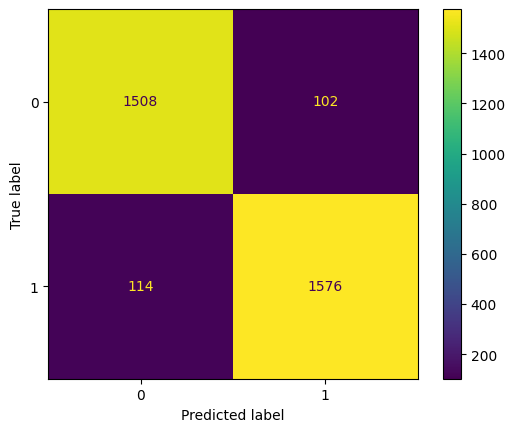

In [25]:
ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot()

In [27]:
df['Sex'].value_counts()

Sex
Male      5000
Female    5000
Name: count, dtype: int64